In [1]:
import sys
sys.path.append('/home/daniel/PycharmProjects/WageringSystem')
import pickle

FUND_HISTORY_SUMMARIES_PATH = "../data/fund_history_summaries.dat"

with open(FUND_HISTORY_SUMMARIES_PATH, "rb") as f:
    fund_history_summary = pickle.load(f)

fund_history_summary.validation_score

3.3089943624687486

## Payout per odds

In [14]:
from math import floor
import seaborn as sns

payout_win_prob_bins = {}
for betting_slip in fund_history_summary.betting_slips.values():
    success_prob = 0
    for bet in betting_slip.bets:
        success_prob += bet.success_probability

    bin_key = str(floor(success_prob * 10))
    if bin_key not in payout_win_prob_bins:
        payout_win_prob_bins[bin_key] = betting_slip.payout_percentage
    else:
        payout_win_prob_bins[bin_key] += betting_slip.payout_percentage

print(payout_win_prob_bins)

{'0': 0, '6': 0.7718696572094162, '7': 0.2418835670836601, '10': 0.8279810594416892, '9': 1.5514962377812611, '8': -0.03657922341641737}


## Payout per number of horses

In [2]:
import seaborn as sns

betting_slips = fund_history_summary.betting_slips
payout_per_number_of_horses = {}
for betting_slip_date in betting_slips:
    betting_slip = betting_slips[betting_slip_date]
    if betting_slip.n_runners not in payout_per_number_of_horses:
        payout_per_number_of_horses[betting_slip.n_runners] = betting_slip.payout
    else:
        payout_per_number_of_horses[betting_slip.n_runners] += betting_slip.payout

ax = sns.barplot(list(payout_per_number_of_horses.keys()), list(payout_per_number_of_horses.values()))
ax.set(xlabel='Number of horses', ylabel='Total Payout')

AttributeError: 'BettingSlip' object has no attribute 'n_runners'

## Best paying tracks

{'Catterick': -0.5596347647413044, 'Bangor': -0.20706662908813103, 'Hamilton': 0.006225055237294441, 'Kempton': 3.3337953392318207, 'Musselburgh': -0.5307560496023159, 'York': -0.4954966513963965, 'Wolverhampton': 1.5720146315425345, 'Worcester': -0.004428428392792505, 'Leicester': -0.4366483085431567, 'Fontwell': 0.12950240164744528, 'Chepstow': 1.0988055100030036, 'Carlisle': 0.2483894523855597, 'Newbury': -0.2476788173568747, 'Salisbury': -0.06954790787184312, 'Sandown': 0.03259029832458027, 'Lingfield': 1.5316235106599594, 'Newton Abbot': 0.20555963160222712, 'Chester': -0.1141476598956265, 'Stratford': 0.21626908802729616, 'Southwell': 1.9925086136062449, 'Sedgefield': 0.012058951982531818, 'Chelmsford': 1.4209412521961524, 'Ffos Las': 0.2899309803946464, 'Newcastle': -0.9318621620779264, 'Goodwood': 0.4114653210111518, 'Thirsk': 0.22122678955393094, 'Beverley': 0.6488256699391486, 'Yarmouth': -0.09299096086747405, 'Cartmel': 0.13943826323849037, 'Epsom': -0.006511815401138158, 'H

[Text(0.5, 0, 'Track'), Text(0, 0.5, 'Total Payout')]

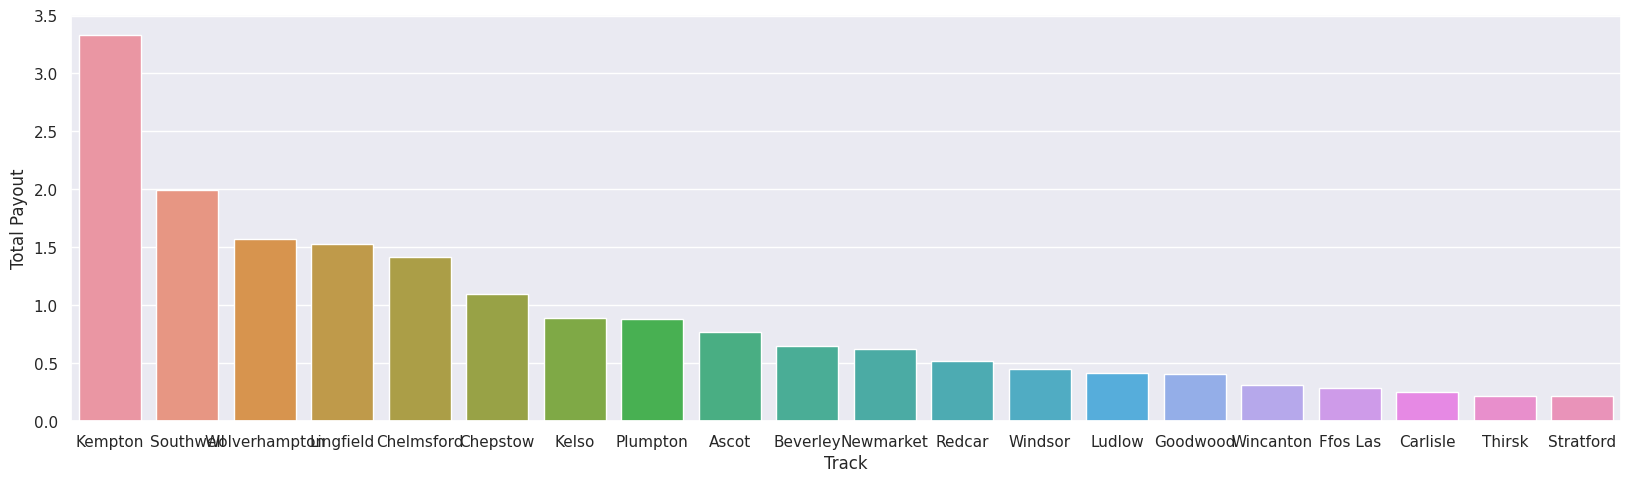

In [17]:
betting_slips = fund_history_summary.betting_slips
payout_per_track = {}
for betting_slip_date in betting_slips:
    betting_slip = betting_slips[betting_slip_date]
    if len(betting_slip.bets) > 0:
        track_name = betting_slip.bets[0].predicted_horse_results[0].race_name[:-2]
        if track_name not in payout_per_track:
            payout_per_track[track_name] = betting_slip.payout_percentage
        else:
            payout_per_track[track_name] += betting_slip.payout_percentage

print(payout_per_track)

payout_per_track = dict(sorted(payout_per_track.items(), key=lambda item: item[1], reverse=True))

sns.set(rc={'figure.figsize':(20,5.27)})
ax = sns.barplot(x=list(payout_per_track.keys())[:20], y=list(payout_per_track.values())[:20])
ax.set(xlabel='Track', ylabel='Total Payout')

## Worst paying tracks

/home/daniel/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Total Payout'), Text(0.5, 0, 'Track')]

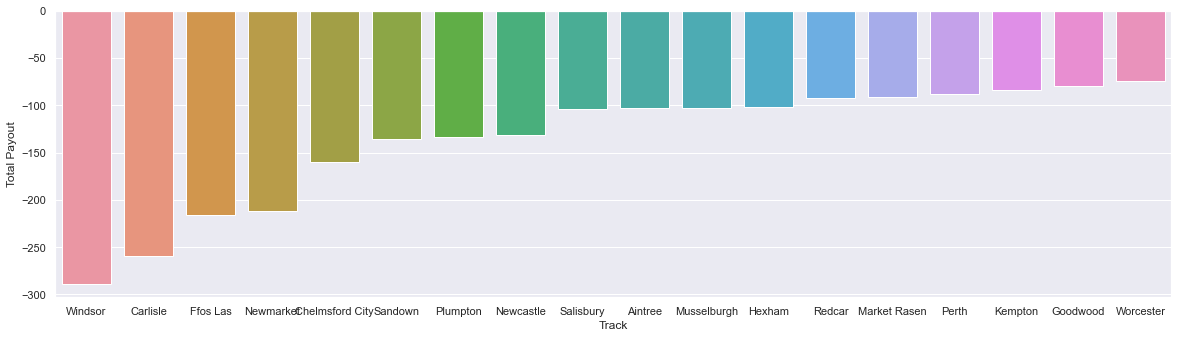

In [4]:
payout_per_track = dict(sorted(payout_per_track.items(), key=lambda item: item[1]))
ax = sns.barplot(list(payout_per_track.keys())[:18], list(payout_per_track.values())[:18])
ax.set(xlabel='Track', ylabel='Total Payout')